# 0.Import Libraries

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson, expon, binom

import seaborn as sns

# 1.Load Dataset

In [90]:
food_consumption = pd.read_csv('Data\\food_consumption.csv').drop('Unnamed: 0',axis=1)
amir_deals = pd.read_csv('Data\\amir_deals.csv').drop('Unnamed: 0',axis=1)
world_happiness = pd.read_csv('Data\\world_happiness.csv').drop('Unnamed: 0',axis=1)

# 2.Measures of Center : Mean, Median, Mode

In [91]:
# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean consumption in USA
print(np.mean(usa_consumption['consumption']))

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


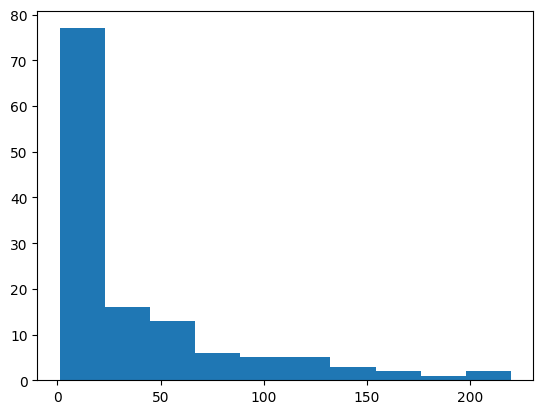

In [92]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# 3.Measures of Spread : Varience, STD, IQR

In [93]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


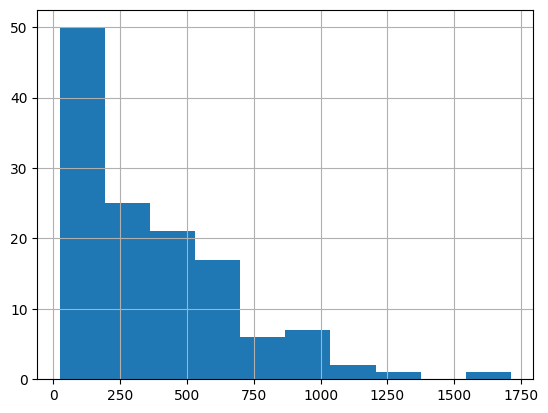

In [94]:
# Create histogram of co2_emission for food_category 'beef
food_consumption[food_consumption['food_category']=='beef']['co2_emission'].hist()
plt.show()

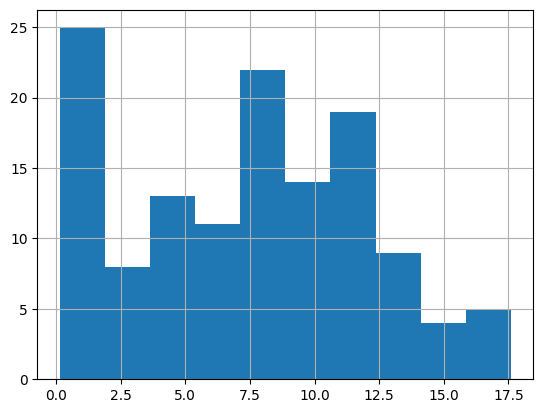

In [95]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category']=='eggs']['co2_emission'].hist()
plt.show()

In [96]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], 0.5))

16.53


In [97]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [98]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [99]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# 4.Sampling
## 4.1 Sampling without replacement

In [100]:
food_consumption.sample(2)

,country,food_category,consumption,co2_emission
412,Germany,eggs,12.20,11.21
899,Niger,rice,13.17,16.85


In [101]:
np.random.seed(10)
food_consumption.sample(2)

,country,food_category,consumption,co2_emission
820,Trinidad and Tobago,dairy,103.80,147.85
35,Iceland,beef,13.36,412.26


## 4.2 Sampling with replacement

In [102]:
food_consumption.sample(2,replace=True)

,country,food_category,consumption,co2_emission
1267,Nigeria,beef,2.33,71.90
776,Saudi Arabia,dairy,83.65,119.15


# 5.Calculating Probabilities
**We will calculate probability of each product accuring in "amir_deals" data**

In [103]:
probs = amir_deals['product'].value_counts() / amir_deals.shape[0]
probs

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64

In [104]:
amir_deals.groupby('product').count() / amir_deals.shape[0]

,client,status,amount,num_users
product,,,,
Product A,0.129213,0.129213,0.129213,0.129213
Product B,0.348315,0.348315,0.348315,0.348315
Product C,0.084270,0.084270,0.084270,0.084270
Product D,0.224719,0.224719,0.224719,0.224719
Product E,0.028090,0.028090,0.028090,0.028090
Product F,0.061798,0.061798,0.061798,0.061798
Product G,0.011236,0.011236,0.011236,0.011236
Product H,0.044944,0.044944,0.044944,0.044944
Product I,0.039326,0.039326,0.039326,0.039326


<Axes: >

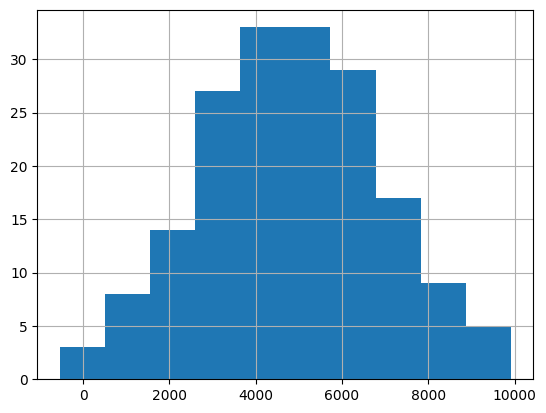

In [105]:
amir_deals.amount.hist()

In [106]:
amir_deals.describe()

,amount,num_users
count,178.000000,178.000000
mean,4812.000337,37.651685
std,2058.173225,27.354794
min,-539.230000,1.000000
25%,3415.927500,14.250000
50%,4805.190000,32.500000
75%,6217.257500,58.000000
max,9913.270000,99.000000


# 6.Normal Distributions

<Axes: >

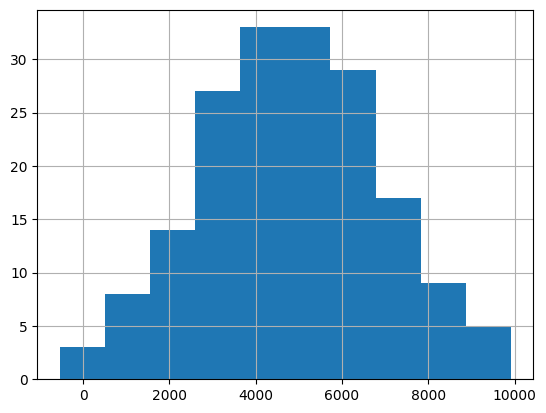

In [107]:
amir_deals['amount'].hist()

In [108]:
amir_deals['amount'].mean(), amir_deals['amount'].std()

(np.float64(4812.000337078652), np.float64(2058.1732253555597))

### 1) What's the probability of Amir closing a deal worth less than $7500? With a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. 

In [109]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000,2000)

print(prob_less_7500)

0.8943502263331446


### 2) What's the probability of Amir closing a deal worth more than $1000?

In [110]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


### 3) What's the probability of Amir closing a deal worth between $3000 and $7000?

In [111]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

0.6826894921370859


### 4) What amount will 25% of Amir's sales be less than?

In [112]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

3651.0204996078364


# 7.Binomial Probabilities
### 1) Assume that Amir wins 30% of deals.What's the probability that Amir closes all 3 deals in a week? 

In [113]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.027


### 2) What's the probability that Amir closes 1 or fewer deals in a week?

In [114]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

0.784


### 3) What's the probability that Amir closes more than 1 deal?

In [115]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1-binom.cdf(1,3,0.3)

print(prob_greater_than_1)

0.21599999999999997


# 8.Central Limit Theorem 

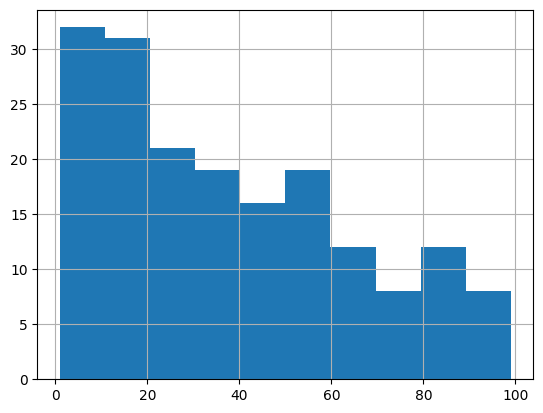

In [116]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

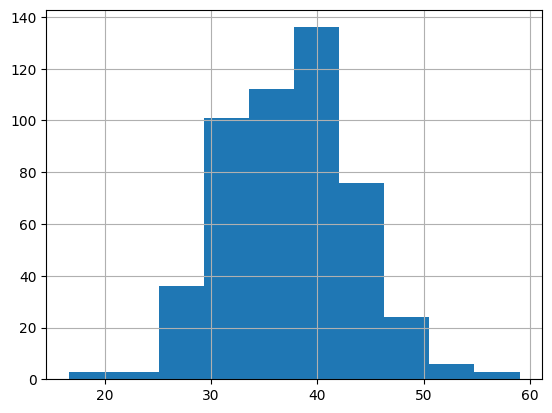

In [117]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(500):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

# 9.Poisson Distributions
### 1) Calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

In [118]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


### 2) Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [119]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


### 3) What's the probability that Amir responds to 2 or fewer leads in a day?

In [120]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


### 4) What's the probability that Amir responds to more than 10 leads in a day?

In [121]:
# Probability of > 10 responses
prob_over_10 = 1-poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


# 10.Exponential Distributions

### 1) What's the probability it takes Amir less than an hour to respond to a lead?  On average, he responds to 1 request every 2.5 hours.

In [122]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


### 2) What's the probability it takes Amir more than 4 hours to respond to a lead?

In [123]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


### 3) What's the probability it takes Amir 3-4 hours to respond to a lead?

In [124]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


# 11.Correlation

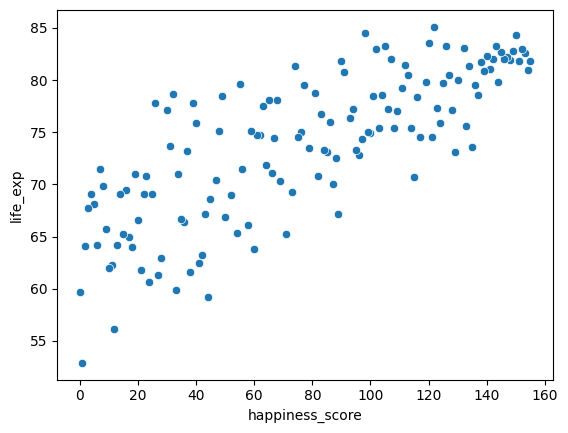

In [125]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='happiness_score', y='life_exp', data=world_happiness)

# Show plot
plt.show()

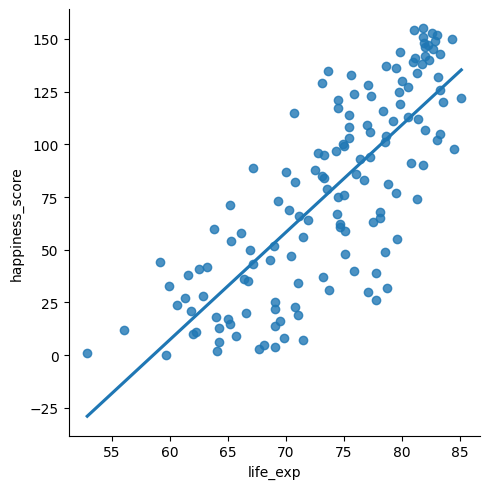

In [126]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness,ci=None)

# Show plot
plt.show()

In [127]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062


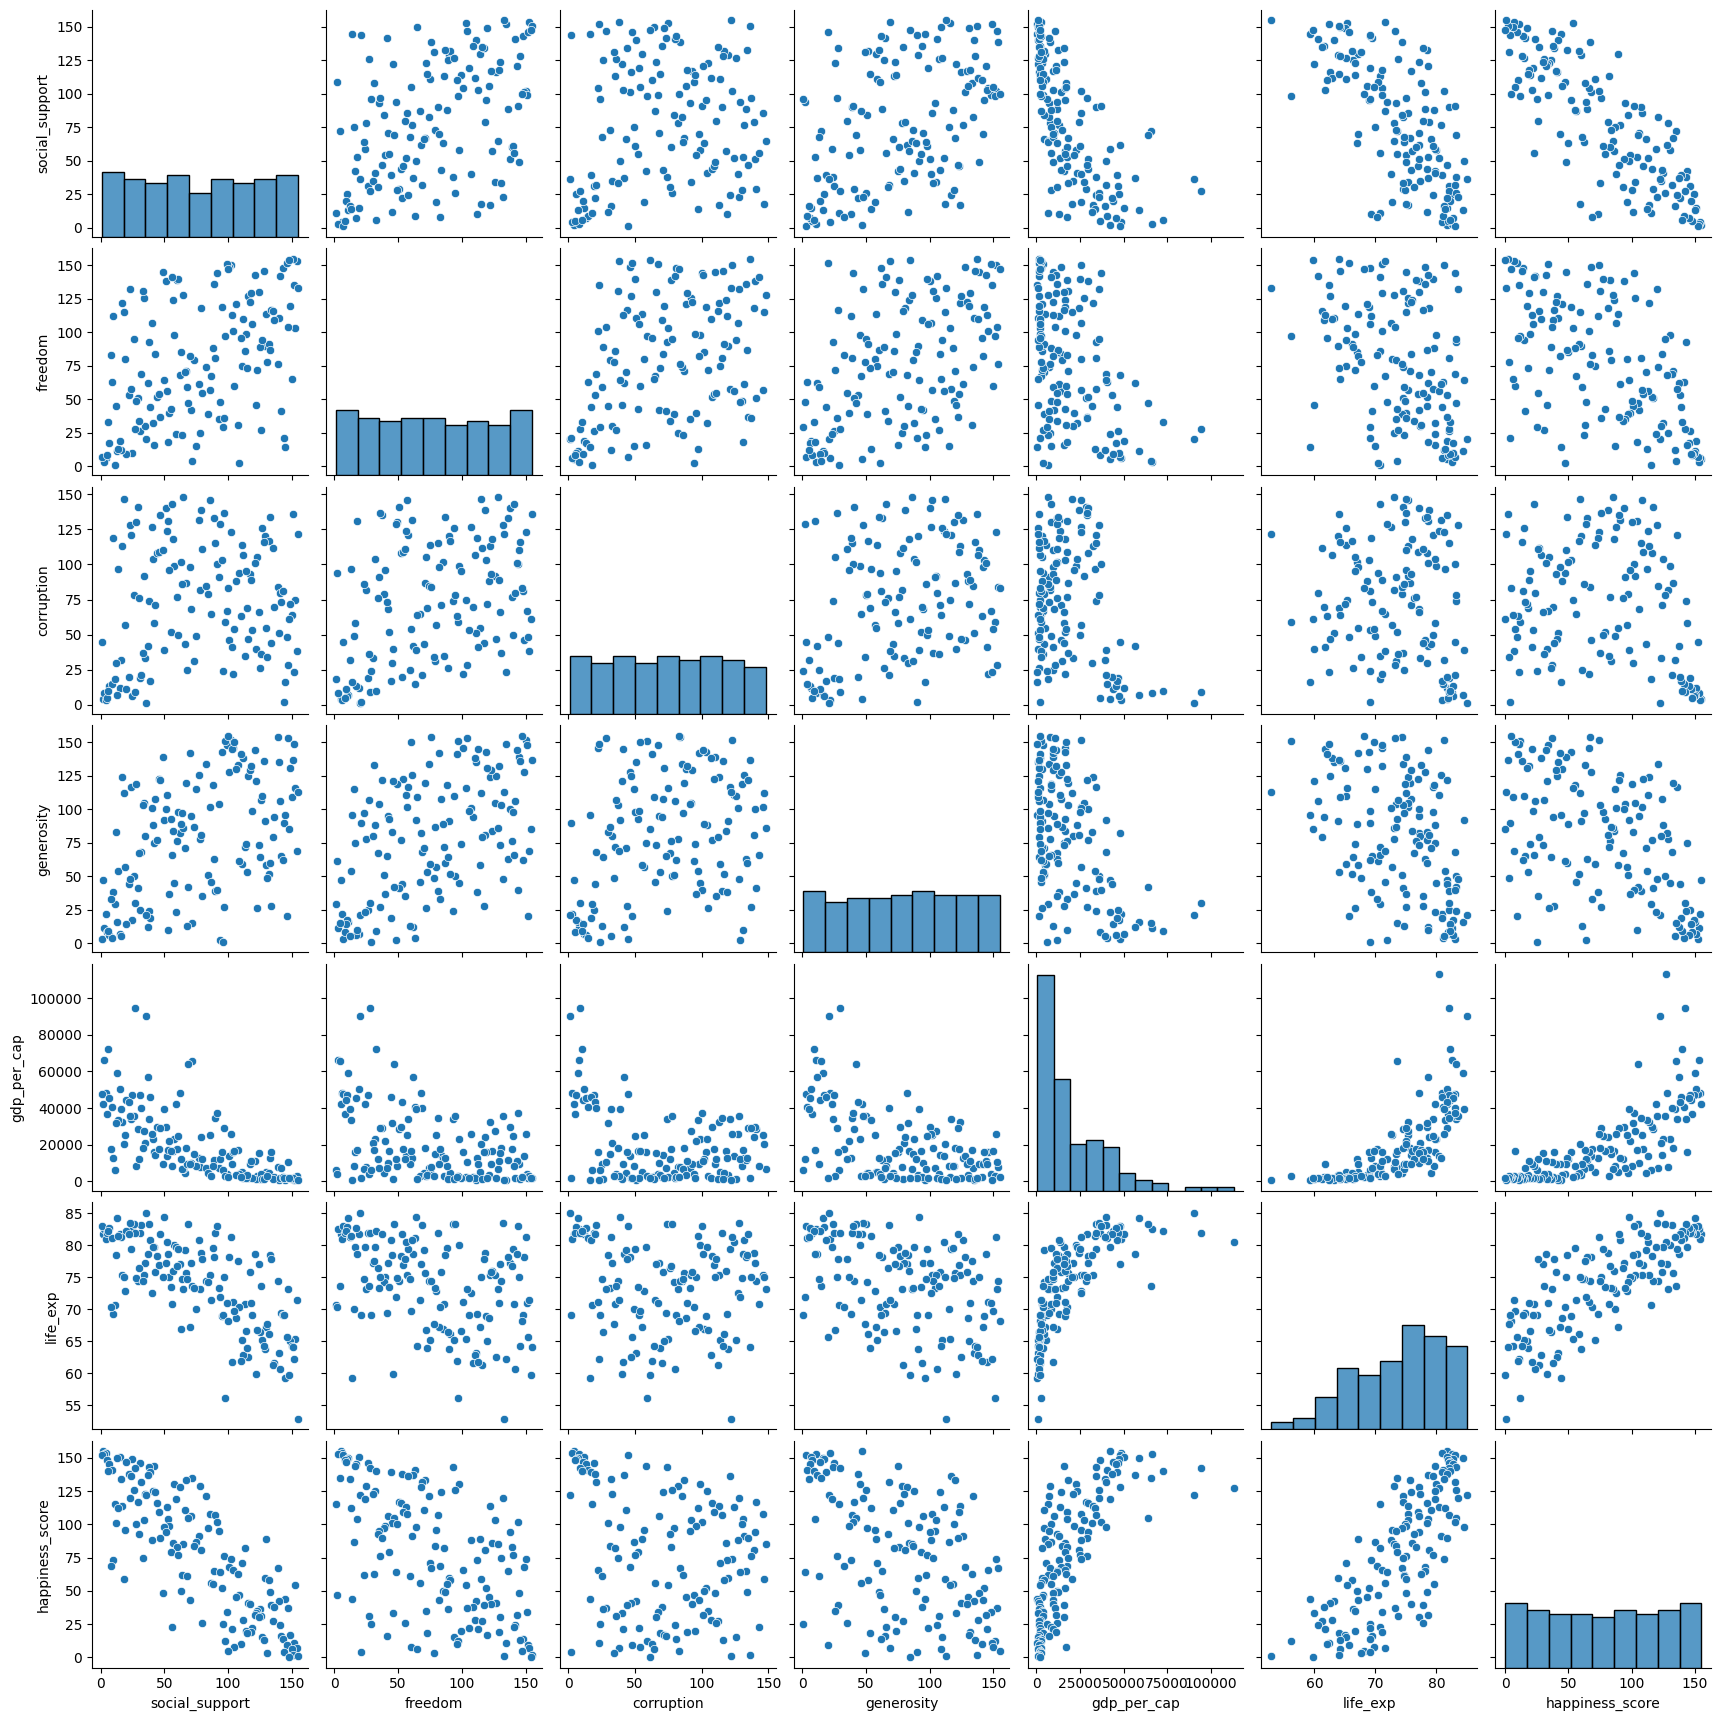

In [128]:
sns.pairplot(world_happiness)

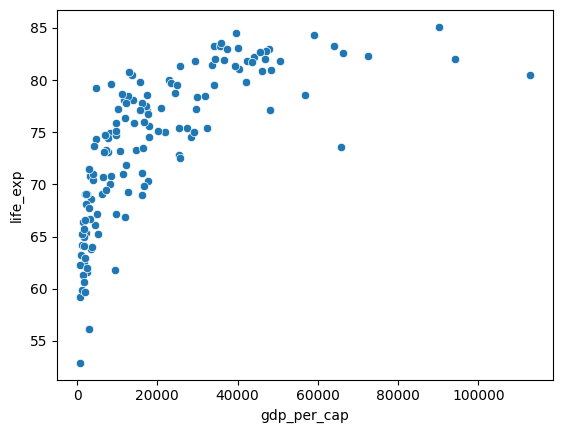

In [129]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()

In [130]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

0.7019547642148015


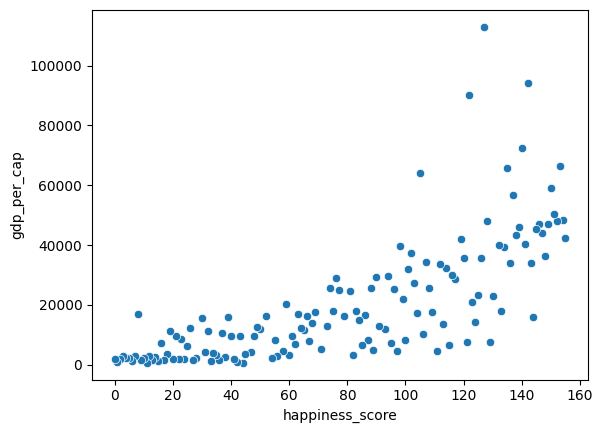

0.7279733012222976


In [131]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='happiness_score',y='gdp_per_cap',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

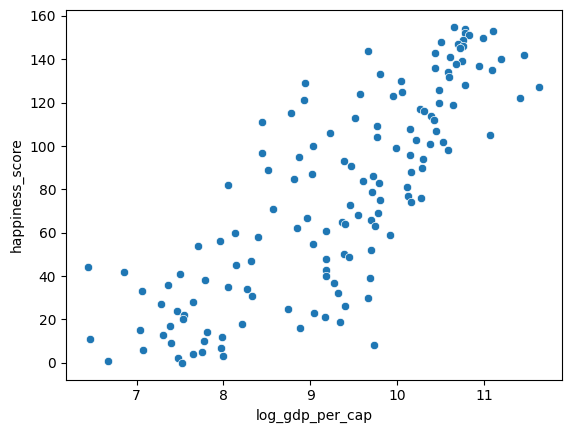

0.8043146004918289


In [132]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['happiness_score'].corr(world_happiness['log_gdp_per_cap'])
print(cor)